In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = "C:/Users/owner/OneDrive/Documents/Job prep/Projects/Ecom-project/traffic_fact_table.csv" 
traffic_df = pd.read_csv(file_path)

# Display the first few rows
print(traffic_df.head())


                  time user_id        source  device action_detail  \
0  2024-12-04 08:33:00       1      Referral  Mobile  Product View   
1  2024-12-04 09:03:00       1      Referral  Tablet  Product View   
2  2024-12-04 08:03:00       1  Social Media  Mobile     Page View   
3  2024-12-04 15:03:00       1         Email  Mobile     Page View   
4  2024-12-04 12:33:00       1  Social Media  Mobile  Product View   

                           reference_link product_id  ads_spent  \
0  https://year-end-sale.com/product-page        383   2.930000   
1  https://year-end-sale.com/product-page        911   7.520000   
2        https://year-end-sale.com/offers        977   1.265218   
3   https://holiday-sale.com/product-page        410   0.000000   
4          https://holiday-sale.com/deals        368   3.780381   

   discount_amount  session_id        date  weekday  activity_weight  
0              0.0           1  2024-12-04        2              0.9  
1              0.0           1  20

C:\Users\owner\AppData\Local\Temp\ipykernel_19040\3268797453.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_df = pd.read_csv(file_path)


In [2]:
print(traffic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204416 entries, 0 to 204415
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             204416 non-null  object 
 1   user_id          204416 non-null  object 
 2   source           204416 non-null  object 
 3   device           204416 non-null  object 
 4   action_detail    204416 non-null  object 
 5   reference_link   146070 non-null  object 
 6   product_id       204416 non-null  object 
 7   ads_spent        204416 non-null  float64
 8   discount_amount  204416 non-null  float64
 9   session_id       204416 non-null  int64  
 10  date             204416 non-null  object 
 11  weekday          204416 non-null  int64  
 12  activity_weight  204416 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 20.3+ MB
None


General EDA

Missing value

In [3]:
missing_value = traffic_df.isnull().sum()
missing_percentage = (missing_value / len(traffic_df))*100
missing_df = pd.DataFrame({"missing count": missing_value, "missing percentage": missing_percentage})
print(missing_df)

                 missing count  missing percentage
time                         0            0.000000
user_id                      0            0.000000
source                       0            0.000000
device                       0            0.000000
action_detail                0            0.000000
reference_link           58346           28.542776
product_id                   0            0.000000
ads_spent                    0            0.000000
discount_amount              0            0.000000
session_id                   0            0.000000
date                         0            0.000000
weekday                      0            0.000000
activity_weight              0            0.000000


data type

In [4]:
print("\nTraffic_Data type")
print(traffic_df.dtypes)


Traffic_Data type
time                object
user_id             object
source              object
device              object
action_detail       object
reference_link      object
product_id          object
ads_spent          float64
discount_amount    float64
session_id           int64
date                object
weekday              int64
activity_weight    float64
dtype: object


mixed data type check

In [5]:
for col in traffic_df.columns:
    unique_types = traffic_df[col].apply(type).nunique()
    if unique_types > 1:
        print(f"mixed data type in {col}")

mixed data type in user_id
mixed data type in reference_link


1. Verify Numerical (suppose to be) Columns

In [6]:
# Identify numeric columns
numeric_columns = ["ads_spent", "discount_amount", "product_id", "session_id", "user_id"]

for col in numeric_columns:
    if col in traffic_df.columns:  # Ensure the column exists in the DataFrame
        print(f"\nChecking numeric column: {col}")
        
        # Detect invalid non-numeric values
        invalid_values = []
        for value in traffic_df[col]:
            try:
                # Try converting the value to a float
                float(value)
            except (ValueError, TypeError):
                # If conversion fails, it's an invalid value
                invalid_values.append(value)
        
        # Print results
        if invalid_values:
            print(f"Invalid values in '{col}': {set(invalid_values)}")
            print(f"Count of invalid values in '{col}': {len(invalid_values)}")
        else:
            print(f"No invalid values found in '{col}'.")



Checking numeric column: ads_spent
No invalid values found in 'ads_spent'.

Checking numeric column: discount_amount
No invalid values found in 'discount_amount'.

Checking numeric column: product_id
Invalid values in 'product_id': {'invalid', 'Unknown', 'prod$%', 'NA123'}
Count of invalid values in 'product_id': 6014

Checking numeric column: session_id
No invalid values found in 'session_id'.

Checking numeric column: user_id
Invalid values in 'user_id': {'user_8860', 'user_5626', 'user_6581', 'user_181', 'user_280', 'user_1129', 'user_2378', 'user_7975', 'user_4494', 'user_6735', 'user_8787', 'user_5714', 'user_7441', 'user_6912', 'user_2900', 'user_4425', 'user_5358', 'user_7670', 'user_9909', 'user_7680', 'user_256', 'user_7571', 'user_1698', 'user_9545', 'user_7027', 'user_7385', 'user_7657', 'user_3817', 'user_169', 'user_2340', 'user_2737', 'user_6057', 'user_9448', 'user_2546', 'user_67', 'user_8923', 'user_8886', 'user_1806', 'user_7038', 'user_8213', 'user_2798', 'user_9865

In [7]:
import numpy as np
# Identify numeric columns
numeric_columns = ["ads_spent", "discount_amount", "product_id", "user_id"]

# Dictionary to store invalid values
invalid_values_dict = {col: [] for col in numeric_columns}

for col in numeric_columns:
    if col in traffic_df.columns:  # Ensure the column exists in the DataFrame
        for value in traffic_df[col]:
            try:
                # Try converting the value to a float
                float(value)
            except (ValueError, TypeError):
                # If conversion fails, it's an invalid value
                invalid_values_dict[col].append(value)

# Create a DataFrame from the invalid values dictionary
# Ensure each list in the dictionary has equal length by padding with NaN
max_length = max(len(values) for values in invalid_values_dict.values())
padded_invalid_values = {col: values + [np.nan] * (max_length - len(values)) for col, values in invalid_values_dict.items()}

invalid_values_df = pd.DataFrame(padded_invalid_values)

# Display the invalid values DataFrame
print("\nInvalid Values DataFrame:")
print(invalid_values_df)


Invalid Values DataFrame:
      ads_spent  discount_amount product_id  user_id
0           NaN              NaN    Unknown    1abcd
1           NaN              NaN    Unknown    1abcd
2           NaN              NaN    Unknown    1abcd
3           NaN              NaN    Unknown    1abcd
4           NaN              NaN    Unknown    1abcd
...         ...              ...        ...      ...
6012        NaN              NaN    Unknown  usr_!@#
6013        NaN              NaN    Unknown  usr_!@#
6014        NaN              NaN        NaN  usr_!@#
6015        NaN              NaN        NaN  usr_!@#
6016        NaN              NaN        NaN  usr_!@#

[6017 rows x 4 columns]


Negative values

In [8]:
# Identify numeric columns
numeric_columns = ["ads_spent", "discount_amount", "product_id", "session_id"]

# Check for non-numeric or invalid values in numeric columns
for col in numeric_columns:
    if col in traffic_df.columns:  # Ensure the column exists in the DataFrame
     
        # Ensure the column is numeric
        traffic_df[col] = pd.to_numeric(traffic_df[col], errors="coerce")

        # Check for negative values
        negative_values = traffic_df[traffic_df[col] < 0][col]
        if not negative_values.empty:
            print(f"Negative values found in '{col}':")
            print(negative_values.head())


2. unique values in categorical columns

In [9]:
# Check unique values in categorical columns
categorical_columns = ["source", "device", "action_detail"]

for col in categorical_columns:
    if col in traffic_df.columns:
        print(f"\nUnique values in categorical column '{col}':")
        unique_values = traffic_df[col].unique()
        print(unique_values)
        
        # Check for blank or inconsistent values
        inconsistent_values = []
        for value in unique_values:
            if isinstance(value, str) and value.strip() == "":
                inconsistent_values.append(value)
        if inconsistent_values:
            print(f"Inconsistent values in '{col}': {inconsistent_values}")



Unique values in categorical column 'source':
['Referral' 'Social Media' 'Email' 'Direct' 'Search Engine']

Unique values in categorical column 'device':
['Mobile' 'Tablet' 'Desktop']

Unique values in categorical column 'action_detail':
['Product View' 'Page View' 'Purchase' 'Checkout' 'Add to Cart']


3. Time value check

In [10]:
# Check for invalid datetime values in the 'time' column
if "time" in traffic_df.columns:
    # Attempt to convert the entire column to datetime, invalid entries will become NaT
    converted_time = pd.to_datetime(traffic_df["time"], errors="coerce")
    
    # Identify invalid values (where conversion failed)
    invalid_dates = traffic_df.loc[converted_time.isna(), "time"]
    
    # Display unique invalid values
    if not invalid_dates.empty:
        print("\nInvalid datetime values in 'time':")
        print(invalid_dates.unique())


4. Logical check

#Business rules

In [11]:
campaign_periods = [
    {"name": "Holiday Sale", "start": "2024-12-01", "end": "2024-12-15"},
    {"name": "Year-End Sale", "start": "2024-12-20", "end": "2024-12-31"}
]
valid_sources = ["Direct", "Referral", "Email", "Social Media"]
valid_reference_links = [
    "https://holiday-sale.com/product-page",
    "https://holiday-sale.com/deals",
    "https://year-end-sale.com/product-page",
    "https://year-end-sale.com/offers"
]

a. product action Without Valid Product IDs

In [12]:
required_action = ["Purchase", "Product View", "Add to Cart"]

product_action_with_no_product_id = traffic_df[(traffic_df["action_detail"].isin(required_action)) &
                               (traffic_df["product_id"].isna())]
if not product_action_with_no_product_id.empty:
    print("\nPurchases with invalid product IDs:")
    print(product_action_with_no_product_id.head())


Purchases with invalid product IDs:
                    time user_id        source  device action_detail  \
105  2024-12-04 19:42:00       8        Direct  Mobile  Product View   
184  2025-01-01 00:00:00      40  Social Media  Mobile   Add to Cart   
219  2024-12-07 10:24:00      42      Referral  Mobile   Add to Cart   
235  2024-12-04 08:12:00      43  Social Media  Mobile  Product View   
260  2024-12-05 10:56:00      44         Email  Mobile   Add to Cart   

                             reference_link  product_id  ads_spent  \
105                                     NaN         NaN   0.000000   
184        https://year-end-sale.com/offers         NaN   2.158759   
219  https://year-end-sale.com/product-page         NaN   6.940000   
235          https://holiday-sale.com/deals         NaN   2.371500   
260        https://year-end-sale.com/offers         NaN   0.000000   

     discount_amount  session_id        date  weekday  activity_weight  
105              0.0          57  20

In [13]:
# Helper function: Check if time falls in a campaign period
def is_in_campaign_period(timestamp):
    for period in campaign_periods:
        if pd.Timestamp(period["start"]) <= timestamp <= pd.Timestamp(period["end"]):
            return True
    return False

Purchase with no prior action

In [14]:
import pandas as pd

# Ensure the dataset's name is traffic_df
traffic_df['time'] = pd.to_datetime(traffic_df['time'], errors='coerce')

# Step 1: Sort by user_id and time
traffic_df = traffic_df.sort_values(by=['user_id', 'time']).reset_index(drop=True)

# Step 2: Create Session ID
# Calculate the time difference between consecutive actions for the same user
traffic_df['time_diff'] = traffic_df.groupby('user_id')['time'].diff()

# Assign a new session ID whenever the time difference is greater than 30 minutes or for the first action
traffic_df['session_id'] = (
    ((traffic_df['time_diff'] > pd.Timedelta(minutes=60)) | (traffic_df['time_diff'].isna()))
    .cumsum()
)


In [15]:
# Step 3: Identify Sessions with Purchases
# Mark rows with valid prior actions (anything except "Purchase" and "Checkout")
traffic_df['is_prior_action'] = ~traffic_df['action_detail'].isin(["Purchase", "Checkout"])

# Identify sessions with at least one "Purchase"
purchase_sessions = traffic_df[traffic_df['action_detail'] == "Purchase"].groupby(['user_id', 'session_id'])['time'].min()

# Remove pre-existing 'purchase_time' column if it exists
traffic_df = traffic_df.drop(columns=['purchase_time'], errors='ignore')

# Map the earliest purchase time to each session
traffic_df = traffic_df.merge(
    purchase_sessions.rename('purchase_time').reset_index(),
    on=['user_id', 'session_id'],
    how='left'
)

# Step 4: Identify Rows Prior to the Purchase Time
traffic_df['is_prior_to_purchase'] = (
    (traffic_df['time'] < traffic_df['purchase_time']) & traffic_df['is_prior_action']
)

# Step 5: Check if Each Session Has Any Prior Action Before Purchase
session_prior_actions = traffic_df.groupby(['user_id', 'session_id'])['is_prior_to_purchase'].any()

# Create a flag for sessions with prior actions
session_prior_actions = session_prior_actions.reset_index().rename(columns={'is_prior_to_purchase': 'has_prior_action'})

# Merge the flag back to the main dataset
traffic_df = traffic_df.merge(
    session_prior_actions,
    on=['user_id', 'session_id'],
    how='left'
)

# Fill missing values in `has_prior_action` (default to False)
traffic_df['has_prior_action'] = traffic_df['has_prior_action'].fillna(False)

# Step 6: Filter Sessions with Purchases and No Prior Actions
sessions_with_invalid_purchases = traffic_df[
    (traffic_df['action_detail'] == "Purchase") & ~traffic_df['has_prior_action']
]

# Output the result
print("Sessions with Purchases and No Prior Actions:")
print(sessions_with_invalid_purchases)

# Optional: Return or Save the filtered data for further analysis


Sessions with Purchases and No Prior Actions:
                      time    user_id         source   device action_detail  \
247    2024-12-12 08:48:00         43  Search Engine  Desktop      Purchase   
1405   2024-12-04 08:14:00        105  Search Engine   Mobile      Purchase   
1410   2024-12-04 10:44:00        105          Email  Desktop      Purchase   
2089   2024-12-01 08:51:00        430          Email   Mobile      Purchase   
2291   2024-12-06 11:27:00        439       Referral   Mobile      Purchase   
...                    ...        ...            ...      ...           ...   
202369 2025-01-03 09:00:00  user_7011  Search Engine   Mobile      Purchase   
202701 2024-12-08 04:32:00  user_7496         Direct  Desktop      Purchase   
202715 2024-12-08 11:32:00  user_7513   Social Media   Mobile      Purchase   
202836 2024-12-04 16:26:00   user_769         Direct   Tablet      Purchase   
203489 2025-01-01 07:30:00  user_8629         Direct  Desktop      Purchase   

     

In [16]:
# Count rows with "Purchase" action
purchase_count = sessions_with_invalid_purchases[sessions_with_invalid_purchases['action_detail'] == "Purchase"].shape[0]

# Print the count
print("No prior action Purchase:", purchase_count)


No prior action Purchase: 395


In [17]:
# Count the total number of "Purchase" actions in the dataset
total_purchases = traffic_df[traffic_df['action_detail'] == "Purchase"].shape[0]

print(f"Total Purchases: {total_purchases}")


Total Purchases: 2484


Invalid 'Direct' source in ads session

In [18]:
invalid_source_link = traffic_df[(traffic_df['source'] == 'Direct') & traffic_df['reference_link'].notna()]
print(invalid_source_link)


                      time    user_id  source   device action_detail  \
168    2024-12-03 17:48:00         10  Direct   Mobile     Page View   
215    2024-12-04 11:34:00         42  Direct   Tablet      Checkout   
328    2024-12-07 11:14:00         47  Direct  Desktop     Page View   
405    2024-12-04 13:55:00         51  Direct   Mobile   Add to Cart   
454    2025-01-01 04:30:00         54  Direct   Mobile     Page View   
...                    ...        ...     ...      ...           ...   
204158 2025-01-01 19:30:00  user_9613  Direct   Mobile  Product View   
204181 2025-01-02 07:00:00  user_9643  Direct  Desktop   Add to Cart   
204182 2025-01-02 07:30:00  user_9644  Direct   Mobile     Page View   
204212 2024-12-02 18:05:00  user_9711  Direct   Mobile     Page View   
204370 2024-12-06 01:05:00  user_9921  Direct   Mobile      Checkout   

                         reference_link  product_id  ads_spent  \
168     https://invalid-direct-link.com        46.0        0.0   
215

ads source without ads link

In [19]:
ads_source_no_link = traffic_df[
    (traffic_df['source'].isin(['Social Media' 'Email' 'Search Engine'])) & traffic_df['reference_link'].isna()
]
print(ads_source_no_link)

Empty DataFrame
Columns: [time, user_id, source, device, action_detail, reference_link, product_id, ads_spent, discount_amount, session_id, date, weekday, activity_weight, time_diff, is_prior_action, purchase_time, is_prior_to_purchase, has_prior_action]
Index: []


Ads spent > 0 for session with source = 'Direct

In [20]:
ad_spent_direct = traffic_df[(traffic_df['source'] == 'Direct') & (traffic_df['ads_spent'] > 0)]
print(ad_spent_direct)

Empty DataFrame
Columns: [time, user_id, source, device, action_detail, reference_link, product_id, ads_spent, discount_amount, session_id, date, weekday, activity_weight, time_diff, is_prior_action, purchase_time, is_prior_to_purchase, has_prior_action]
Index: []


Discount > 0 for action is not 'Purchase'

In [21]:
traffic_df['discount_amount'] = pd.to_numeric(traffic_df['discount_amount'], errors='coerce')


In [22]:
invalid_discount_rows = traffic_df[(traffic_df['discount_amount'] > 0) & (traffic_df['action_detail'] != 'Purchase')]
print(invalid_discount_rows)

                      time    user_id         source   device action_detail  \
1557   2025-01-01 00:30:00        402         Direct   Mobile   Add to Cart   
13489  2024-12-05 12:33:00       1019  Search Engine   Mobile   Add to Cart   
18094  2025-01-01 00:00:00       4149         Direct   Mobile   Add to Cart   
33295  2025-01-01 00:00:00       4920       Referral   Mobile   Add to Cart   
38315  2025-01-01 00:00:00       5172       Referral   Mobile   Add to Cart   
42212  2024-12-16 08:04:00       5373          Email   Mobile   Add to Cart   
44069  2024-12-03 08:04:00       5464   Social Media   Mobile   Add to Cart   
45527  2024-12-04 17:53:00       5540         Direct   Mobile   Add to Cart   
91941  2024-12-03 13:08:00       7862   Social Media   Mobile   Add to Cart   
96989  2024-12-07 16:37:00       8120         Direct   Mobile   Add to Cart   
106759 2024-12-05 08:03:00       8615  Search Engine   Mobile   Add to Cart   
110683 2025-01-01 00:00:00       8814  Search Engine

Data Cleaning

a. Format error

user_id

In [23]:
# Function to clean user_id column
def clean_user_id(value):
    if value is None:  # Handle None values explicitly
        return "Unknown"
    try:
        # Check if value is numeric
        float(value)
        return int(value)  # Convert numeric value to integer
    except ValueError:
        # If not numeric, check for 'user_xxx' pattern
        if isinstance(value, str) and value.startswith("user_"):
            numeric_part = value.split("_")[1]  # Extract the numeric part
            if numeric_part.isdigit():
                return int(numeric_part)  # Convert to integer
        # For all other cases, return "Unknown"
        return "Unknown"

# Identify invalid user_id values in the original dataset
invalid_values = []
for value in traffic_df['user_id']:
    try:
        float(value)  # Check if the value is numeric
    except (ValueError, TypeError):
        invalid_values.append(value)

# Create a DataFrame with invalid values for cleaning
invalid_values_df = pd.DataFrame({"user_id": invalid_values})

# Apply the cleaning function to the user_id column in invalid_values_df
if 'user_id' in invalid_values_df.columns:
    invalid_values_df['cleaned_user_id'] = invalid_values_df['user_id'].apply(clean_user_id)

# Create a mapping dictionary from invalid to cleaned values
mapping_dict = dict(zip(invalid_values_df['user_id'], invalid_values_df['cleaned_user_id']))

# Map the cleaned user_id values back to the original dataset
traffic_df['user_id'] = traffic_df['user_id'].map(mapping_dict).fillna(traffic_df['user_id'])

# Display the updated DataFrame
print("Updated traffic_df:")
print(traffic_df)

Updated traffic_df:
                      time  user_id         source   device action_detail  \
0      2024-12-04 08:03:00        1   Social Media   Mobile     Page View   
1      2024-12-04 08:33:00        1       Referral   Mobile  Product View   
2      2024-12-04 09:03:00        1       Referral   Tablet  Product View   
3      2024-12-04 09:33:00        1       Referral   Mobile  Product View   
4      2024-12-04 10:03:00        1       Referral   Mobile     Page View   
...                    ...      ...            ...      ...           ...   
204411 2025-01-01 00:00:00  Unknown  Search Engine  Desktop  Product View   
204412 2025-01-01 02:30:00  Unknown  Search Engine  Desktop  Product View   
204413 2025-01-01 03:00:00  Unknown  Search Engine   Mobile   Add to Cart   
204414 2025-01-01 03:30:00  Unknown  Search Engine   Mobile   Add to Cart   
204415 2025-01-01 04:00:00  Unknown  Search Engine   Mobile      Checkout   

                                reference_link  product

discount amount

In [24]:
# Identify rows with invalid values in `discount_amount`
invalid_discount_values = {'Missing', 'Unknown'}
is_invalid_discount = traffic_df['discount_amount'].isin(invalid_discount_values)

# Check if the row does not have a purchase action
is_not_purchase = traffic_df['action_detail'] != 'Purchase'

# Impute `discount_amount` based on the condition
traffic_df.loc[is_invalid_discount & is_not_purchase, 'discount_amount'] = 0
traffic_df.loc[is_invalid_discount & ~is_not_purchase, 'discount_amount'] = None

# Convert `discount_amount` to numeric for consistency
traffic_df['discount_amount'] = pd.to_numeric(traffic_df['discount_amount'], errors='coerce')

product_id

In [25]:
# Identify rows with invalid values in `product_id`
invalid_product_values = {'invalid', 'Unknown', 'NA123', 'prod$%'}
is_invalid_product = traffic_df['product_id'].isin(invalid_product_values)

# Impute invalid `product_id` values to 'Unknown'
traffic_df.loc[is_invalid_product, 'product_id'] = 'Unknown'


C:\Users\owner\AppData\Local\Temp\ipykernel_19040\23853905.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  traffic_df.loc[is_invalid_product, 'product_id'] = 'Unknown'


b. Mixed data type

In [26]:
# Convert `user_id` to a consistent data type (numeric, with invalids set to None)
traffic_df['user_id'] = pd.to_numeric(traffic_df['user_id'], errors='coerce')

# Ensure `reference_link` is a string, replacing invalid or missing values with None
traffic_df['reference_link'] = traffic_df['reference_link'].astype(str).replace({'nan': None})

# Convert `product_id` to string to handle potential mixed data types consistently
traffic_df['product_id'] = traffic_df['product_id'].astype(str)

# Convert `discount_amount` to numeric, with invalid values coerced to None
traffic_df['discount_amount'] = pd.to_numeric(traffic_df['discount_amount'], errors='coerce')


c. Business rules errors

purchase intent without product id

In [27]:
# Define required actions
required_action = ["Purchase", "Product View", "Add to Cart"]

# Identify rows with required actions but missing product_id
product_action_with_no_product_id = traffic_df[
    (traffic_df["action_detail"].isin(required_action)) &
    (traffic_df["product_id"].isna())
]

# Impute missing product_id with the most frequent product_id for the same user_id
for user_id in product_action_with_no_product_id["user_id"].unique():
    # Find the most frequent product_id for this user_id
    most_frequent_product = traffic_df[
        (traffic_df["user_id"] == user_id) &
        (traffic_df["action_detail"] == "Purchase") &
        (~traffic_df["product_id"].isna())
    ]["product_id"].mode()

    # Update rows with missing product_id for this user_id
    if not most_frequent_product.empty:
        traffic_df.loc[
            (traffic_df["user_id"] == user_id) &
            (traffic_df["product_id"].isna()) &
            (traffic_df["action_detail"].isin(required_action)),
            "product_id"
        ] = most_frequent_product[0]

# Display the updated rows for verification
print("\nUpdated rows with imputed product_id:")
print(traffic_df.loc[product_action_with_no_product_id.index])



Updated rows with imputed product_id:
Empty DataFrame
Columns: [time, user_id, source, device, action_detail, reference_link, product_id, ads_spent, discount_amount, session_id, date, weekday, activity_weight, time_diff, is_prior_action, purchase_time, is_prior_to_purchase, has_prior_action]
Index: []


impute product id from non product intent action

In [28]:
# Define non-product intent actions (actions not involving a product)
non_product_intent_actions = ["Page View", "Checkout"]

# Identify rows with non-product intent actions
non_product_intent_rows = traffic_df["action_detail"].isin(non_product_intent_actions)

# Impute `product_id` to null (None) for non-product intent actions
traffic_df.loc[non_product_intent_rows, "product_id"] = None

# Display the first few rows to confirm changes
print("\nUpdated rows with non-product intent actions:")
print(traffic_df[non_product_intent_rows].head())



Updated rows with non-product intent actions:
                 time  user_id        source  device action_detail  \
0 2024-12-04 08:03:00      1.0  Social Media  Mobile     Page View   
4 2024-12-04 10:03:00      1.0      Referral  Mobile     Page View   
5 2024-12-04 10:33:00      1.0      Referral  Tablet      Checkout   
6 2024-12-04 11:03:00      1.0        Direct  Mobile     Page View   
7 2024-12-04 11:33:00      1.0        Direct  Mobile      Checkout   

                     reference_link product_id  ads_spent  discount_amount  \
0  https://year-end-sale.com/offers       None   1.265218              0.0   
4  https://year-end-sale.com/offers       None   3.730000              0.0   
5    https://holiday-sale.com/deals       None   7.610000              0.0   
6                              None       None   0.000000              0.0   
7                              None       None   0.000000              0.0   

   session_id        date  weekday  activity_weight       time_

discount > 0 for non purchase

In [29]:
# Impute the discount_amount to 0 for these rows
traffic_df.loc[invalid_discount_rows.index, 'discount_amount'] = 0

# Confirm the update
print(traffic_df.loc[invalid_discount_rows.index])

                      time  user_id         source   device action_detail  \
1557   2025-01-01 00:30:00    402.0         Direct   Mobile   Add to Cart   
13489  2024-12-05 12:33:00   1019.0  Search Engine   Mobile   Add to Cart   
18094  2025-01-01 00:00:00   4149.0         Direct   Mobile   Add to Cart   
33295  2025-01-01 00:00:00   4920.0       Referral   Mobile   Add to Cart   
38315  2025-01-01 00:00:00   5172.0       Referral   Mobile   Add to Cart   
42212  2024-12-16 08:04:00   5373.0          Email   Mobile   Add to Cart   
44069  2024-12-03 08:04:00   5464.0   Social Media   Mobile   Add to Cart   
45527  2024-12-04 17:53:00   5540.0         Direct   Mobile   Add to Cart   
91941  2024-12-03 13:08:00   7862.0   Social Media   Mobile   Add to Cart   
96989  2024-12-07 16:37:00   8120.0         Direct   Mobile   Add to Cart   
106759 2024-12-05 08:03:00   8615.0  Search Engine   Mobile   Add to Cart   
110683 2025-01-01 00:00:00   8814.0  Search Engine   Mobile   Add to Cart   

invalid ads in 'Direct source

In [30]:
# Set 'reference_link' to null (None in Python) and 'ads_spent' to 0
traffic_df.loc[(traffic_df['source'] == 'Direct') & traffic_df['reference_link'].notna(), ['reference_link', 'ads_spent']] = [None, 0]


ads spent = 0 in valid reference link rows

In [31]:
# Filter for valid reference links (non-null)
valid_reference_rows = traffic_df['reference_link'].notna()

# Calculate the mean ads_spent for rows with valid reference links
mean_ads_spent = traffic_df.loc[valid_reference_rows & (traffic_df['ads_spent'] > 0), 'ads_spent'].mean()

# Impute ads_spent = 0 in rows with valid reference links
traffic_df.loc[valid_reference_rows & (traffic_df['ads_spent'] == 0), 'ads_spent'] = mean_ads_spent


Analysis

In [32]:
# Define the list of original columns (excluding 'session_id')
original_columns = ['time', 'user_id', 'source', 'device', 'action_detail', 'reference_link', 'product_id', 'ads_spent', 'discount_amount']

# Ensure 'session_id' is retained along with the original columns
columns_to_keep = original_columns + ['session_id']

# Drop all other columns except the ones specified in columns_to_keep
traffic_df = traffic_df[columns_to_keep]


I. Overview

In [33]:
import matplotlib.pyplot as plt

1. Total session by day

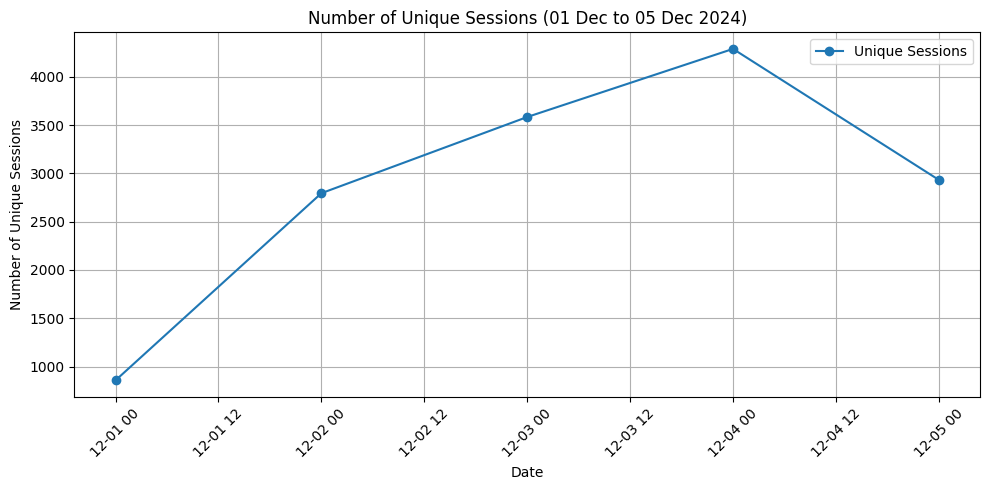

In [34]:
# Ensure the 'time' column is in datetime format
traffic_df['time'] = pd.to_datetime(traffic_df['time'], errors='coerce')

# Extract the date from the 'time' column
traffic_df['date'] = traffic_df['time'].dt.date

# Filter the data for the specified date range
filtered_traffic_df = traffic_df[
    (traffic_df['date'] >= pd.Timestamp('2024-12-01').date()) &
    (traffic_df['date'] <= pd.Timestamp('2024-12-05').date())
]

# Count unique session IDs by date
sessions_by_date_filtered = filtered_traffic_df.groupby('date')['session_id'].nunique().reset_index(name='unique_session_count')

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(sessions_by_date_filtered['date'], sessions_by_date_filtered['unique_session_count'], marker='o', linestyle='-', label='Unique Sessions')
plt.title('Number of Unique Sessions (01 Dec to 05 Dec 2024)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Sessions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

2. conversion rate by day

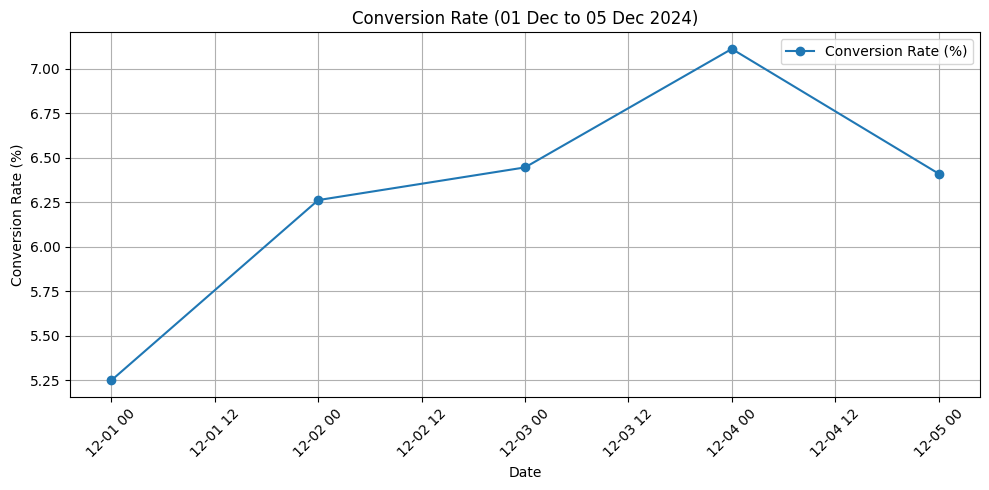

In [35]:
# Filter the data for the specified date range (01 Dec to 04 Dec 2024)
filtered_traffic_df = traffic_df[
    (traffic_df['date'] >= pd.Timestamp('2024-12-01').date()) &
    (traffic_df['date'] <= pd.Timestamp('2024-12-05').date())
]

# Count total sessions by date
total_sessions_by_date = filtered_traffic_df.groupby('date')['session_id'].nunique().reset_index(name='total_sessions')

# Count purchase sessions by date
purchase_sessions_by_date = filtered_traffic_df[filtered_traffic_df['action_detail'] == 'Purchase'] \
    .groupby('date')['session_id'].nunique().reset_index(name='purchase_sessions')

# Merge the two DataFrames to calculate conversion rate
conversion_rate_data = pd.merge(total_sessions_by_date, purchase_sessions_by_date, on='date', how='left').fillna(0)

# Calculate conversion rate
conversion_rate_data['conversion_rate'] = (conversion_rate_data['purchase_sessions'] / conversion_rate_data['total_sessions']) * 100

# Plotting the conversion rate
plt.figure(figsize=(10, 5))
plt.plot(conversion_rate_data['date'], conversion_rate_data['conversion_rate'], marker='o', linestyle='-', label='Conversion Rate (%)')
plt.title('Conversion Rate (01 Dec to 05 Dec 2024)')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

label non buying session based on behavior

In [36]:
import pandas as pd

# Define action categories
product_view_actions = ['Product View']
page_view_actions = ['Page View']
add_to_cart_actions = ['Add to Cart']

# Filter data for sessions between 01 Dec and 05 Dec 2024
filtered_traffic_df = traffic_df[
    (traffic_df['date'] >= pd.Timestamp('2024-12-01').date()) &
    (traffic_df['date'] <= pd.Timestamp('2024-12-05').date())
].copy()

# Identify sessions with purchases
purchase_sessions = filtered_traffic_df.loc[filtered_traffic_df['action_detail'] == 'Purchase', 'session_id'].unique()

# Exclude sessions with purchases
filtered_traffic_df = filtered_traffic_df[~filtered_traffic_df['session_id'].isin(purchase_sessions)]

# Sort data by session_id and time
filtered_traffic_df = filtered_traffic_df.sort_values(by=['session_id', 'time']).reset_index(drop=True)

# Calculate time spent on each action
filtered_traffic_df['time_next'] = filtered_traffic_df.groupby('session_id')['time'].shift(-1)
filtered_traffic_df['time_spent'] = (filtered_traffic_df['time_next'] - filtered_traffic_df['time']).dt.total_seconds()

# Remove rows where time_spent is negative or NaN (e.g., last action in the session)
filtered_traffic_df = filtered_traffic_df[filtered_traffic_df['time_spent'] > 0].copy()

# Precompute boolean masks for action types
filtered_traffic_df['is_product_view'] = filtered_traffic_df['action_detail'].isin(product_view_actions)
filtered_traffic_df['is_page_view'] = filtered_traffic_df['action_detail'].isin(page_view_actions)
filtered_traffic_df['is_add_to_cart'] = filtered_traffic_df['action_detail'].isin(add_to_cart_actions)

# Ensure `user_id` is present in filtered_traffic_df
if 'user_id' not in filtered_traffic_df.columns:
    raise KeyError("The `user_id` column is missing in `filtered_traffic_df`. Ensure it's included in the source data.")

# Aggregate metrics by session and user using precomputed masks
session_metrics = filtered_traffic_df.groupby(['session_id', 'user_id']).agg(
    total_time=('time_spent', 'sum'),
    product_view_time=('time_spent', lambda x: x[filtered_traffic_df.loc[x.index, 'is_product_view']].sum()),
    page_view_time=('time_spent', lambda x: x[filtered_traffic_df.loc[x.index, 'is_page_view']].sum()),
    add_to_cart_count=('is_add_to_cart', 'sum')
).reset_index()

# Define thresholds dynamically using percentiles
thresholds = {
    'total_time': {
        'low': session_metrics['total_time'].quantile(0.25),
        'moderate': session_metrics['total_time'].quantile(0.50),
        'high': session_metrics['total_time'].quantile(0.75)
    },
    'product_view_time': {
        'low': session_metrics['product_view_time'].quantile(0.25),
        'moderate': session_metrics['product_view_time'].quantile(0.50),
        'high': session_metrics['product_view_time'].quantile(0.75)
    },
    'add_to_cart_count': {
        'low': session_metrics['add_to_cart_count'].quantile(0.25),
        'moderate': session_metrics['add_to_cart_count'].quantile(0.50),
        'high': session_metrics['add_to_cart_count'].quantile(0.75)
    }
}

# Label sessions based on updated behavior categories
def label_session(row):
    if row['total_time'] < thresholds['total_time']['low']:
        return 'Low Value Session'
    elif row['page_view_time'] > thresholds['total_time']['moderate'] and row['product_view_time'] < thresholds['product_view_time']['low']:
        return 'Awareness Session'
    elif thresholds['product_view_time']['low'] <= row['product_view_time'] < thresholds['product_view_time']['high'] and row['add_to_cart_count'] < thresholds['add_to_cart_count']['low']:
        return 'Casual Browser'
    elif thresholds['product_view_time']['moderate'] <= row['product_view_time'] and row['add_to_cart_count'] < thresholds['add_to_cart_count']['low']:
        return 'Window Shopping'
    elif thresholds['product_view_time']['low'] <= row['product_view_time'] < thresholds['product_view_time']['high'] and thresholds['add_to_cart_count']['low'] <= row['add_to_cart_count'] < thresholds['add_to_cart_count']['high']:
        return 'Interested but Hesitant'
    elif row['product_view_time'] >= thresholds['product_view_time']['high'] and row['add_to_cart_count'] >= thresholds['add_to_cart_count']['high']:
        return 'Highly Engaged Session'
    return 'other'

# Apply labeling function
session_metrics['shopping_behavior'] = session_metrics.apply(label_session, axis=1)

# Print the final labeled sessions with `user_id`
print(session_metrics)


      session_id  user_id  total_time  product_view_time  page_view_time  \
0              1      1.0     27000.0             7200.0         12600.0   
1              3      4.0     19800.0             1800.0         12600.0   
2              9      6.0      9000.0             4800.0          1800.0   
3             11      7.0      1800.0                0.0             0.0   
4             12      7.0     45000.0            12600.0         12420.0   
...          ...      ...         ...                ...             ...   
9317       31245   9900.0      1800.0                0.0             0.0   
9318       31246   9906.0      1800.0                0.0          1800.0   
9319       31252   9916.0      3600.0                0.0          1800.0   
9320       31253   9919.0      3600.0             1800.0             0.0   
9321       31254    992.0      1800.0                0.0             0.0   

      add_to_cart_count        shopping_behavior  
0                     0             

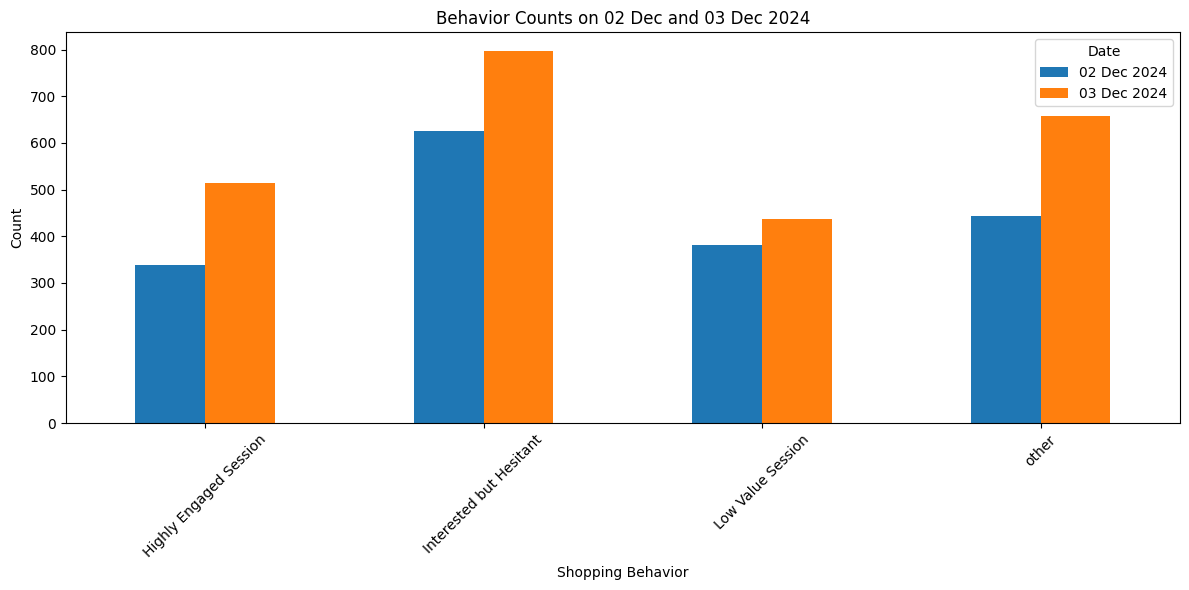

In [37]:
# Filter labeled data for 02 Dec and 03 Dec 2024
filtered_sessions = session_metrics.merge(
    filtered_traffic_df[['session_id', 'date']].drop_duplicates(), on='session_id', how='left'
)
filtered_sessions = filtered_sessions[
    filtered_sessions['date'].isin([pd.Timestamp('2024-12-02').date(), pd.Timestamp('2024-12-03').date()])
]

# Count behavior types for each date
behavior_counts = filtered_sessions.groupby(['date', 'shopping_behavior']).size().reset_index(name='count')

# Pivot the data for easier plotting
behavior_pivot = behavior_counts.pivot(index='shopping_behavior', columns='date', values='count').fillna(0)

# Plotting a column chart for behavior counts
behavior_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Behavior Counts on 02 Dec and 03 Dec 2024')
plt.xlabel('Shopping Behavior')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Date', labels=['02 Dec 2024', '03 Dec 2024'])
plt.tight_layout()
plt.show()

feature importance

In [38]:
import pandas as pd
import numpy as np

# Filter data for 01 Dec to 05 Dec
filtered_traffic_df = traffic_df[
    (traffic_df['date'] >= pd.Timestamp('2024-12-01').date()) &
    (traffic_df['date'] <= pd.Timestamp('2024-12-05').date())
].copy()

# Create the target column 'is_purchase'
filtered_traffic_df['is_purchase'] = (filtered_traffic_df['action_detail'] == 'Purchase').astype(int)

# Define helper functions
def purchase_to_non_purchase_ratio(df, column, target_col='is_purchase'):
    """Calculate purchase to non-purchase ratio for a categorical variable."""
    grouped = df.groupby(column)[target_col].agg(['sum', 'count'])
    grouped['non_purchase'] = grouped['count'] - grouped['sum']
    grouped['ratio'] = grouped['sum'] / grouped['non_purchase']
    return grouped['ratio']

def coefficient_of_variation(ratios):
    """Calculate coefficient of variation (CV) as std/mean."""
    ratios = ratios[ratios > 0]  # Exclude zero ratios
    return ratios.std() / ratios.mean() if len(ratios) > 0 else 0

# Analyze categorical variables
categorical_columns = ['source', 'device', 'product_id', 'user_id']
categorical_results = {}

for col in categorical_columns:
    ratios = purchase_to_non_purchase_ratio(filtered_traffic_df, col)
    cv = coefficient_of_variation(ratios)
    categorical_results[col] = {'cv': cv, 'ratios': ratios}

# Analyze time variable by creating hourly bins
filtered_traffic_df['time_bin'] = pd.cut(filtered_traffic_df['time'].dt.hour, bins=range(0, 25, 1))  # Hourly bins
time_ratios = purchase_to_non_purchase_ratio(filtered_traffic_df, 'time_bin')
time_cv = coefficient_of_variation(time_ratios)

# Print results
print("Categorical Variable Results (CVs):")
for col, result in categorical_results.items():
    print(f"{col}: CV = {result['cv']:.4f}")

print("\nTime Variable Result:")
print(f"Time Variable CV: {time_cv:.4f}")


Categorical Variable Results (CVs):
source: CV = 0.0910
device: CV = 0.0561
product_id: CV = 0.5407
user_id: CV = 1.2536

Time Variable Result:
Time Variable CV: 0.2463


C:\Users\owner\AppData\Local\Temp\ipykernel_19040\2761356436.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(column)[target_col].agg(['sum', 'count'])


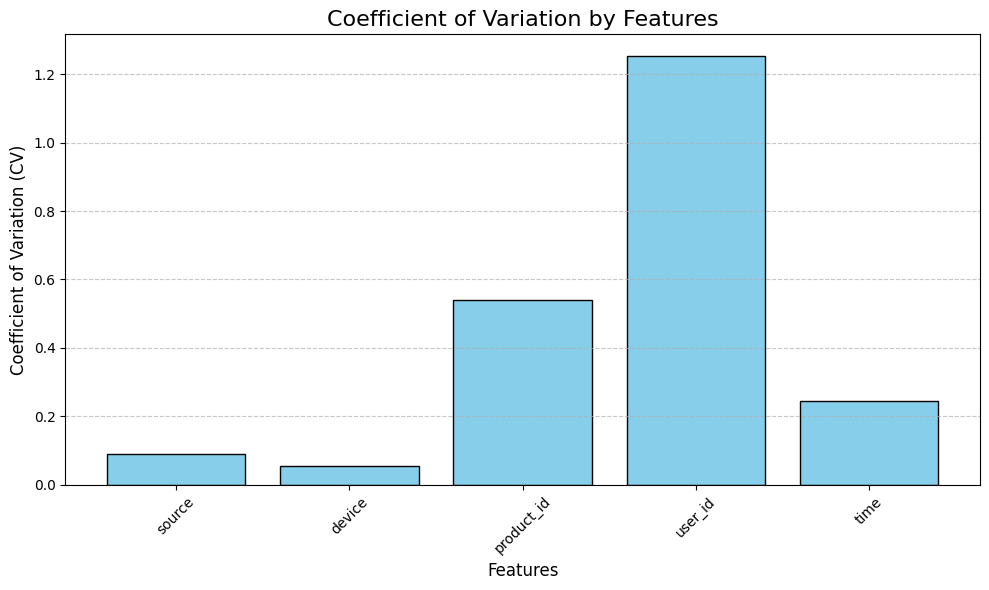

In [39]:
import matplotlib.pyplot as plt

# Extract the coefficient of variation (CV) for categorical features
cv_data = {col: result['cv'] for col, result in categorical_results.items()}

# Add the time variable's CV
cv_data['time'] = time_cv

# Prepare data for plotting
features = list(cv_data.keys())
cv_values = list(cv_data.values())

# Plot the coefficient of variation
plt.figure(figsize=(10, 6))
plt.bar(features, cv_values, color='skyblue', edgecolor='black')
plt.title('Coefficient of Variation by Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient of Variation (CV)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [40]:
# Create the `is_add_to_cart` column
filtered_traffic_df['is_add_to_cart'] = (filtered_traffic_df['action_detail'] == 'Add to Cart').astype(int)

# Filter data for non-purchasing sessions
non_purchasing_sessions = filtered_traffic_df[~filtered_traffic_df['session_id'].isin(purchase_sessions)]

# Calculate session duration for each session
session_durations = non_purchasing_sessions.groupby('session_id').agg(
    session_start=('time', 'min'),
    session_end=('time', 'max')
).reset_index()
session_durations['session_duration'] = (session_durations['session_end'] - session_durations['session_start']).dt.total_seconds()

# Merge session durations back into the non-purchasing sessions
non_purchasing_sessions = pd.merge(
    non_purchasing_sessions,
    session_durations[['session_id', 'session_duration']],
    on='session_id',
    how='left'
)

# Aggregate data by user_id for add_to_cart count and total session duration
non_purchase_user_metrics = non_purchasing_sessions.groupby('user_id').agg(
    add_to_cart_count=('is_add_to_cart', 'sum'),  # Total add-to-cart actions per user
    total_session_duration=('session_duration', 'sum')  # Total session duration per user
).reset_index()

# Scale values using Min-Max scaling
non_purchase_user_metrics['scaled_add_to_cart_count'] = (
    (non_purchase_user_metrics['add_to_cart_count'] - non_purchase_user_metrics['add_to_cart_count'].min()) /
    (non_purchase_user_metrics['add_to_cart_count'].max() - non_purchase_user_metrics['add_to_cart_count'].min())
)

non_purchase_user_metrics['scaled_session_duration'] = (
    (non_purchase_user_metrics['total_session_duration'] - non_purchase_user_metrics['total_session_duration'].min()) /
    (non_purchase_user_metrics['total_session_duration'].max() - non_purchase_user_metrics['total_session_duration'].min())
)

# Calculate priority score (without weights, just multiply scaled metrics)
non_purchase_user_metrics['priority_score'] = (
    non_purchase_user_metrics['scaled_add_to_cart_count'] * non_purchase_user_metrics['scaled_session_duration']
)

# Sort users by priority score in descending order
non_purchase_user_metrics = non_purchase_user_metrics.sort_values(by='priority_score', ascending=False)

# Display the top 10 users by priority score
print(non_purchase_user_metrics.head(10))


      user_id  add_to_cart_count  total_session_duration  \
5162   6584.0                 11               1674000.0   
5645   7206.0                 12               1387440.0   
569     721.0                 13               1209600.0   
5270   6727.0                  8               1900800.0   
519     659.0                  8               1785600.0   
1156   1440.0                  7               2019600.0   
6836   8655.0                  8               1674000.0   
4799   6110.0                  9               1465200.0   
5018   6404.0                 11               1170000.0   
3478   4411.0                 10               1263600.0   

      scaled_add_to_cart_count  scaled_session_duration  priority_score  
5162                  0.846154                 0.828877        0.701357  
5645                  0.923077                 0.686988        0.634142  
569                   1.000000                 0.598930        0.598930  
5270                  0.615385             

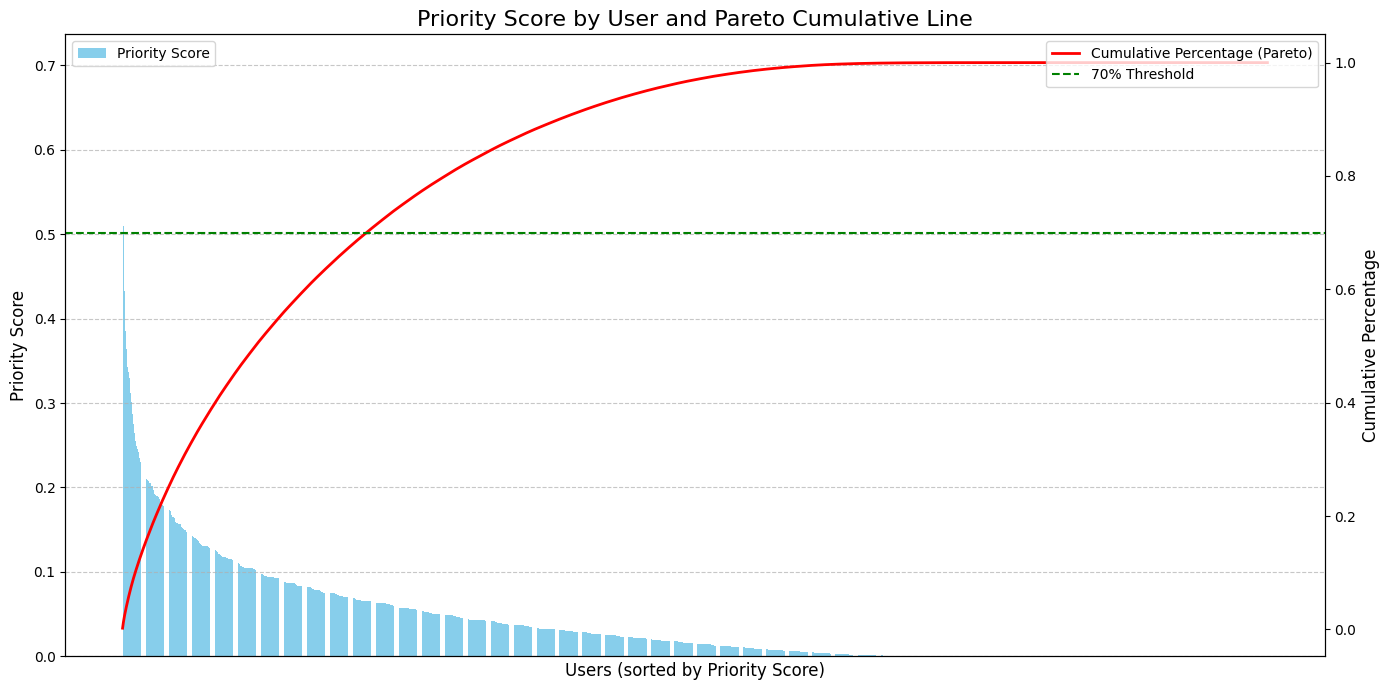

In [41]:
import matplotlib.pyplot as plt

# Sort users by priority score in descending order
non_purchase_user_metrics = non_purchase_user_metrics.sort_values(by='priority_score', ascending=False)
non_purchase_user_metrics['cumulative_priority_score'] = non_purchase_user_metrics['priority_score'].cumsum()
total_priority_score = non_purchase_user_metrics['priority_score'].sum()
non_purchase_user_metrics['cumulative_percentage'] = non_purchase_user_metrics['cumulative_priority_score'] / total_priority_score

# Use numerical indices for the x-axis
x_indices = range(len(non_purchase_user_metrics))

# Plot priority score and cumulative percentage line
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for priority scores by user
ax1.bar(
    x_indices, 
    non_purchase_user_metrics['priority_score'], 
    color='skyblue', 
    label='Priority Score'
)
ax1.set_xlabel('Users (sorted by Priority Score)', fontsize=12)
ax1.set_ylabel('Priority Score', fontsize=12)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(
    x_indices, 
    non_purchase_user_metrics['cumulative_percentage'], 
    color='red', 
    label='Cumulative Percentage (Pareto)', 
    linewidth=2
)
ax2.axhline(y=0.7, color='green', linestyle='--', label='70% Threshold')
ax2.set_ylabel('Cumulative Percentage', fontsize=12)

# Add legends and grid
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Title and layout adjustments
plt.title('Priority Score by User and Pareto Cumulative Line', fontsize=16)
plt.tight_layout()

# Display the chart
plt.show()


In [42]:
# Calculate cumulative priority score to find the top 70% of users
non_purchase_user_metrics = non_purchase_user_metrics.sort_values(by='priority_score', ascending=False)
non_purchase_user_metrics['cumulative_priority_score'] = non_purchase_user_metrics['priority_score'].cumsum()
total_priority_score = non_purchase_user_metrics['priority_score'].sum()
non_purchase_user_metrics['cumulative_percentage'] = non_purchase_user_metrics['cumulative_priority_score'] / total_priority_score

# Filter users contributing to 70% of the total priority score
top_70_percent_users = non_purchase_user_metrics[non_purchase_user_metrics['cumulative_percentage'] <= 0.7]

# Get the list of user IDs in the top 70% of priority scores
top_70_user_ids = top_70_percent_users['user_id']

# Filter the original non-purchasing sessions for these user IDs
top_70_behavior_sessions = session_metrics[session_metrics['user_id'].isin(top_70_user_ids)]

# Count the number of users by behavior labels
user_behavior_counts = top_70_behavior_sessions.groupby('shopping_behavior')['user_id'].nunique().reset_index(name='user_count')

# Display the counts
print(user_behavior_counts)


         shopping_behavior  user_count
0   Highly Engaged Session        1204
1  Interested but Hesitant         312
2        Low Value Session         270
3                    other         499


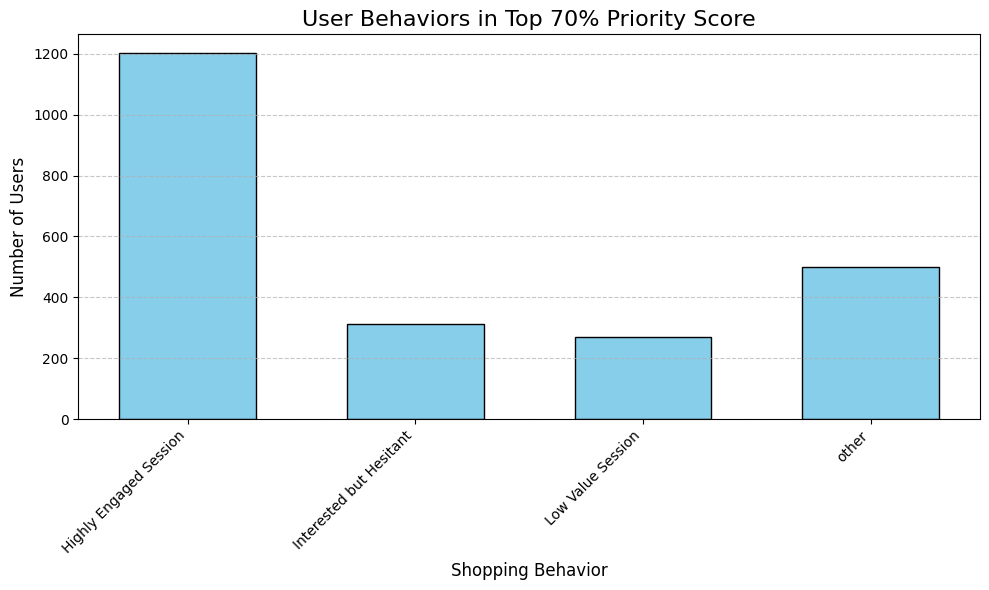

In [44]:
import matplotlib.pyplot as plt

# Data from user_behavior_counts
data = user_behavior_counts

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['shopping_behavior'], data['user_count'], color='skyblue', edgecolor='black', width=0.6)

# Add titles and labels
plt.title('User Behaviors in Top 70% Priority Score', fontsize=16)
plt.xlabel('Shopping Behavior', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha='right')

# Show gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()
